<a href="https://colab.research.google.com/github/aburak256/Currency-with-Twitter/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pickle
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

from metrics import evaluate
from plots import bar_metrics


warnings.filterwarnings("ignore") #We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['figure.figsize'] = 18, 8

with open('scores_difference_tweets.pickle', 'rb') as handle:
    resultsDictTweets = pickle.load(handle)

with open('scores_difference_normal.pickle', 'rb') as handle:
    resultsDict = pickle.load(handle)

## Load our results from the model notebook
with open('predictions_difference_tweets.pickle', 'rb') as handle:
    predictionsDictTweets = pickle.load(handle)

with open('predictions_difference_normal.pickle', 'rb') as handle:
    predictionsDict = pickle.load(handle)

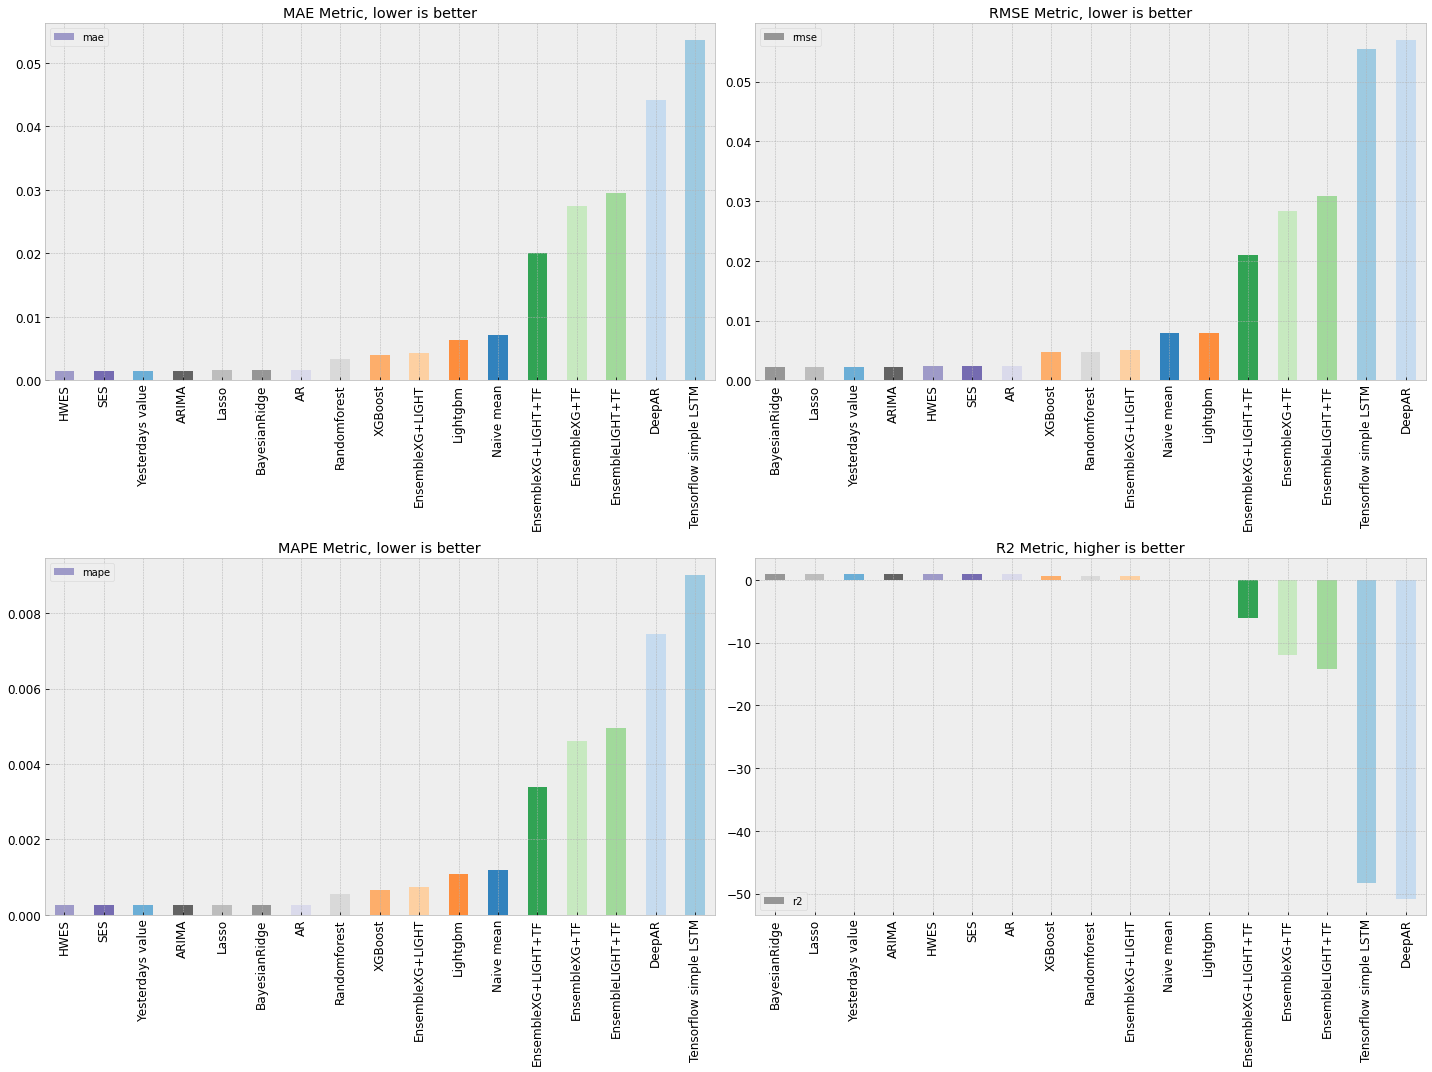

In [ ]:
bar_metrics(resultsDict)

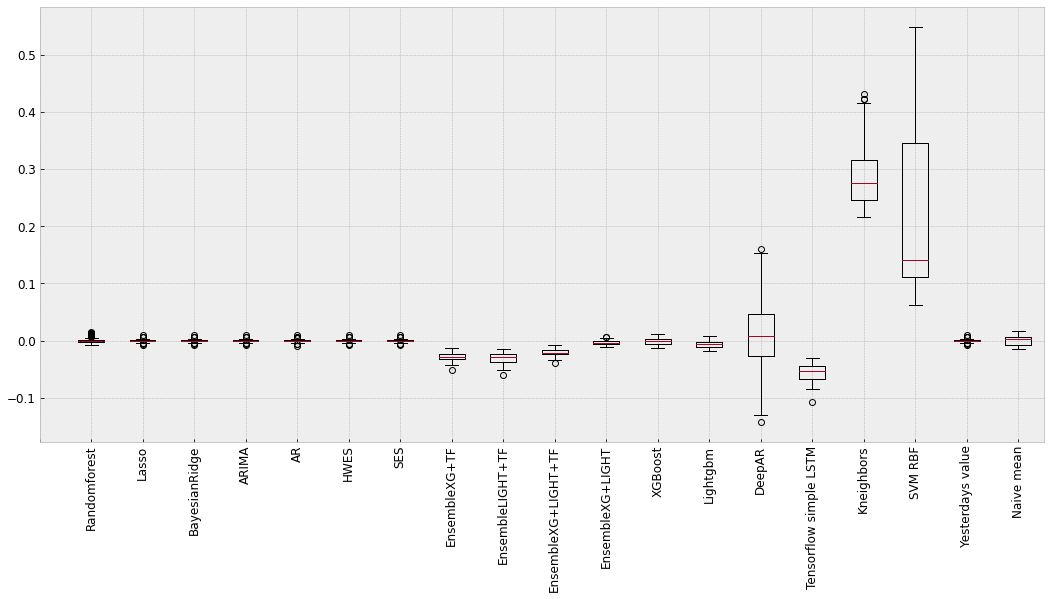

In [ ]:
df_test = pd.read_csv("test.csv")
residuals = [df_test.Rate.values - predictionsDict[u] for u in predictionsDict.keys()]
residuals.reverse()
plt.boxplot(residuals)
ticks = list(predictionsDict.keys())
ticks.reverse()
ticks = [''] + ticks
rang = range(0,len(ticks))
plt.xticks(rang, ticks,rotation='vertical')
pass

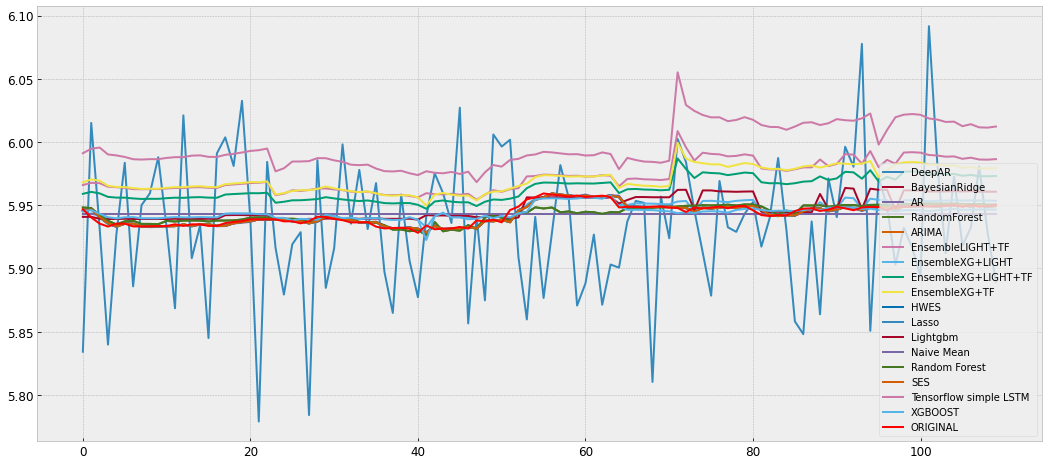

In [ ]:
plt.plot(predictionsDict['DeepAR'], label='DeepAR')
plt.plot(predictionsDict['BayesianRidge'],label='BayesianRidge')
plt.plot(predictionsDict['AR'],label='AR')
plt.plot(predictionsDict['Randomforest'],label='RandomForest')
plt.plot(predictionsDict['ARIMA'], label='ARIMA')
plt.plot(predictionsDict['EnsembleLIGHT+TF'], label='EnsembleLIGHT+TF')
plt.plot(predictionsDict['EnsembleXG+LIGHT'], label='EnsembleXG+LIGHT')
plt.plot(predictionsDict['EnsembleXG+LIGHT+TF'],label='EnsembleXG+LIGHT+TF')
plt.plot(predictionsDict['EnsembleXG+TF'], label='EnsembleXG+TF')
plt.plot(predictionsDict['HWES'], label='HWES')
plt.plot(predictionsDict['Lasso'], label='Lasso')
plt.plot(predictionsDict['Lightgbm'], label='Lightgbm')
plt.plot(predictionsDict['Naive mean'], label='Naive Mean')
plt.plot(predictionsDict['Randomforest'], label='Random Forest')
plt.plot(predictionsDict['SES'], label='SES')
plt.plot(predictionsDict['Tensorflow simple LSTM'], label='Tensorflow simple LSTM')
plt.plot(predictionsDict['XGBoost'], label='XGBOOST')
plt.plot(predictionsDict['ORIGINAL'], color ='red' , label = 'ORIGINAL')
plt.legend()

FileNotFoundError: ignored

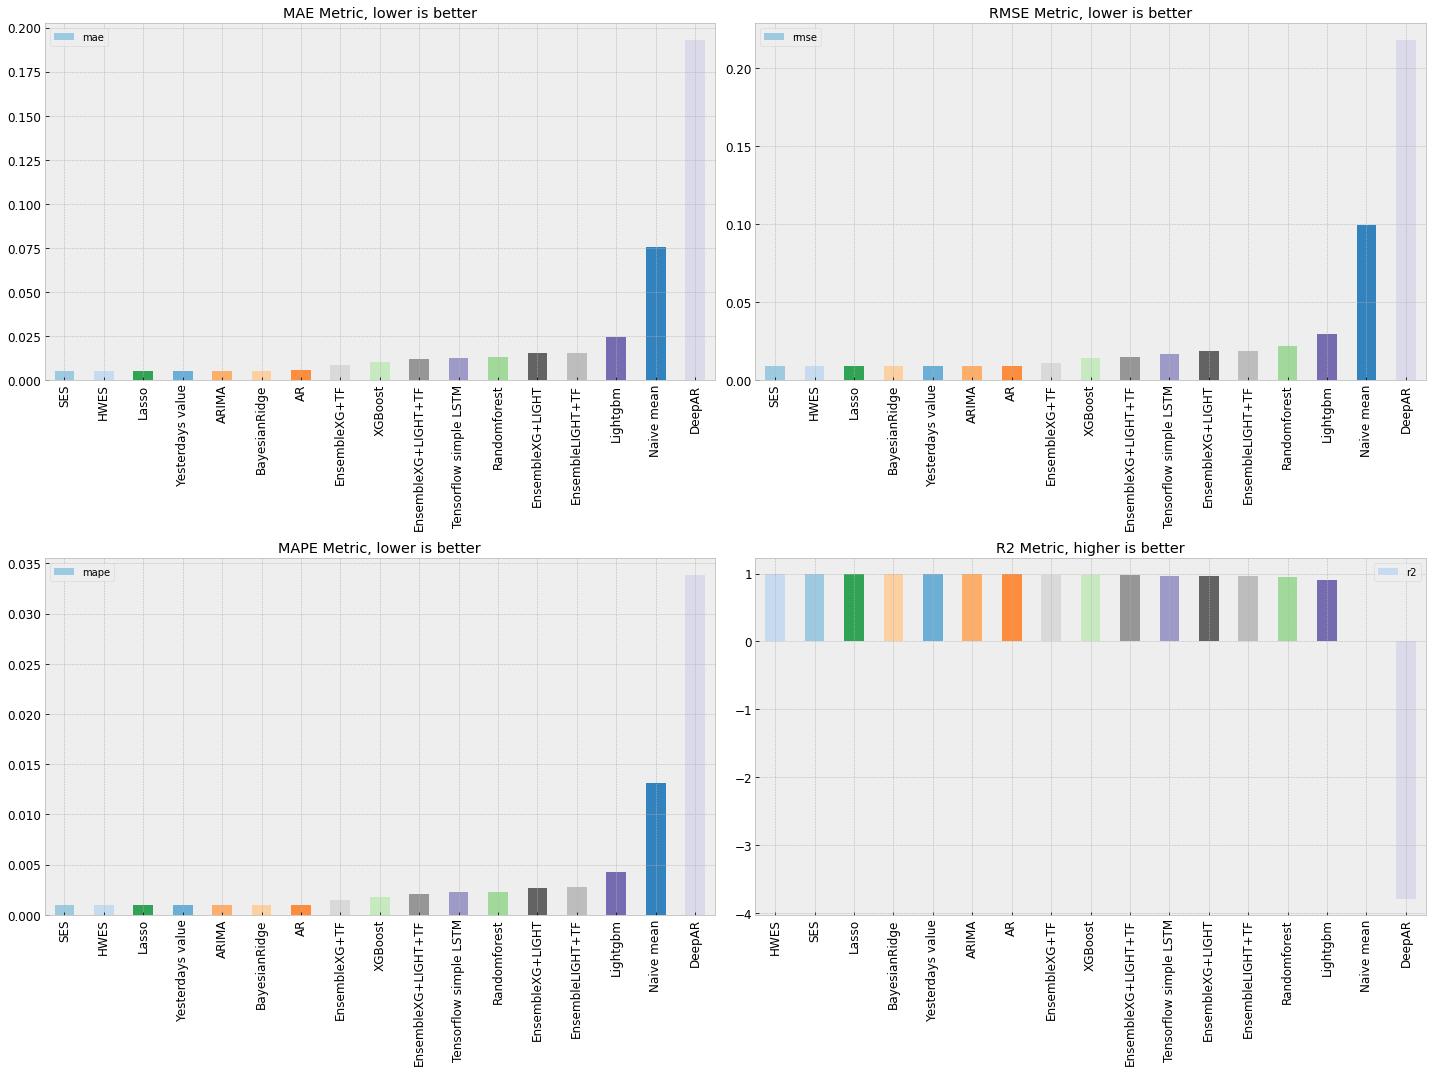

In [ ]:
bar_metrics(resultsDict)

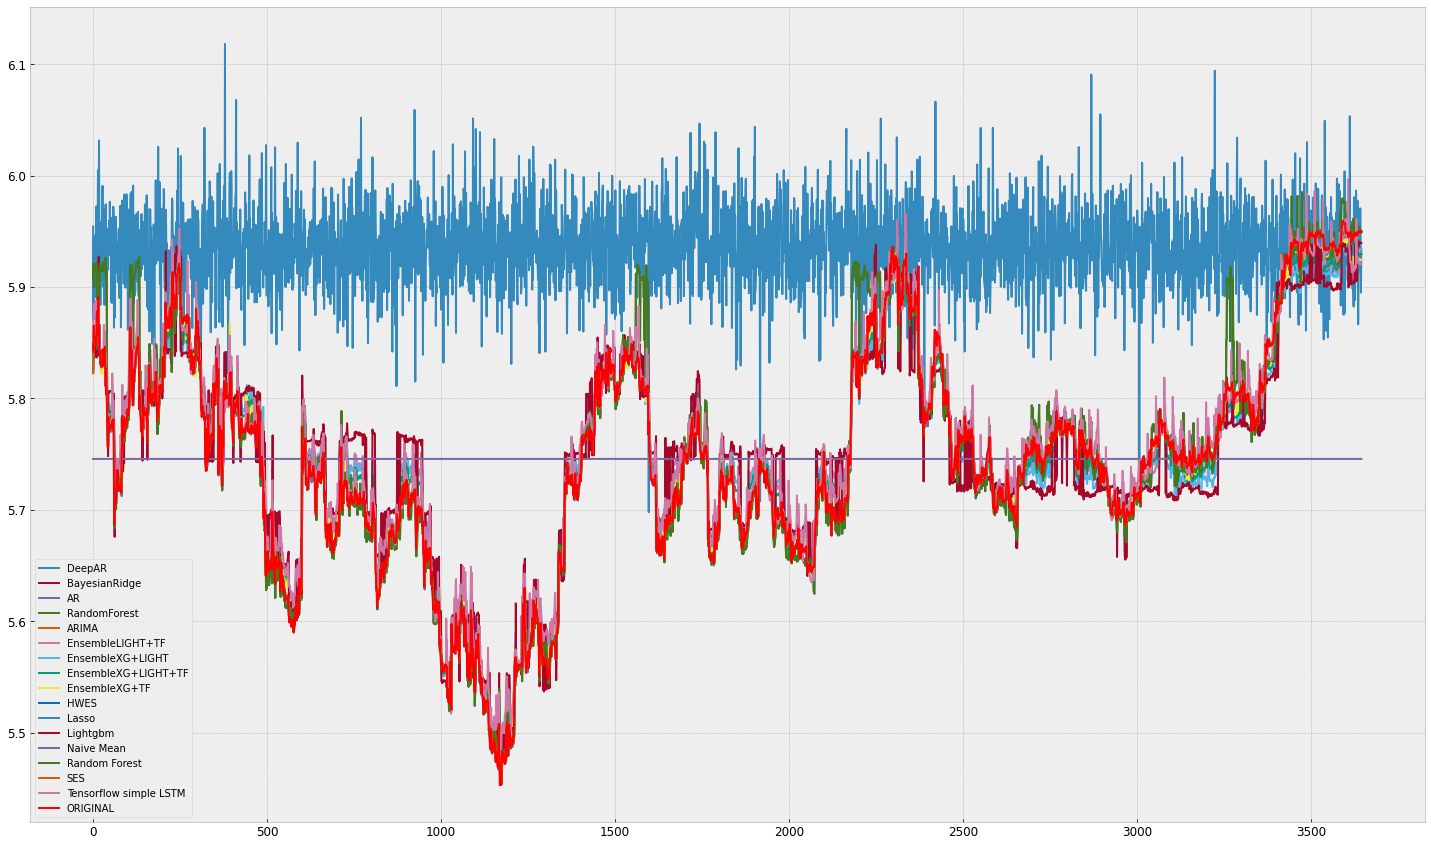

In [ ]:
plt.figure(figsize=(25,15))
plt.plot(predictionsDict['DeepAR'], label='DeepAR')
plt.plot(predictionsDict['BayesianRidge'],label='BayesianRidge')
plt.plot(predictionsDict['AR'],label='AR')
plt.plot(predictionsDict['Randomforest'],label='RandomForest')
plt.plot(predictionsDict['ARIMA'], label='ARIMA')
plt.plot(predictionsDict['EnsembleLIGHT+TF'], label='EnsembleLIGHT+TF')
plt.plot(predictionsDict['EnsembleXG+LIGHT'], label='EnsembleXG+LIGHT')
plt.plot(predictionsDict['EnsembleXG+LIGHT+TF'],label='EnsembleXG+LIGHT+TF')
plt.plot(predictionsDict['EnsembleXG+TF'], label='EnsembleXG+TF')
plt.plot(predictionsDict['HWES'], label='HWES')
plt.plot(predictionsDict['Lasso'], label='Lasso')
plt.plot(predictionsDict['Lightgbm'], label='Lightgbm')
plt.plot(predictionsDict['Naive mean'], label='Naive Mean')
plt.plot(predictionsDict['Randomforest'], label='Random Forest')
plt.plot(predictionsDict['SES'], label='SES')
plt.plot(predictionsDict['Tensorflow simple LSTM'], label='Tensorflow simple LSTM')
plt.plot(predictionsDict['ORIGINAL'], color ='red' , label = 'ORIGINAL')
plt.legend()

In [18]:
resultsComparison = dict()
for model in resultsDict:
  resultsComparison[model] = dict()
  resultsComparison[model]['rmse'] = (resultsDictTweets[model]['rmse']) - (resultsDict[model]['rmse'])
  resultsComparison[model]['mape'] = (resultsDictTweets[model]['mape']) - (resultsDict[model]['mape'])
  resultsComparison[model]['mae'] = (resultsDictTweets[model]['mae']) - (resultsDict[model]['mae'])
  resultsComparison[model]['r2'] = (resultsDictTweets[model]['r2']) - (resultsDict[model]['r2'])

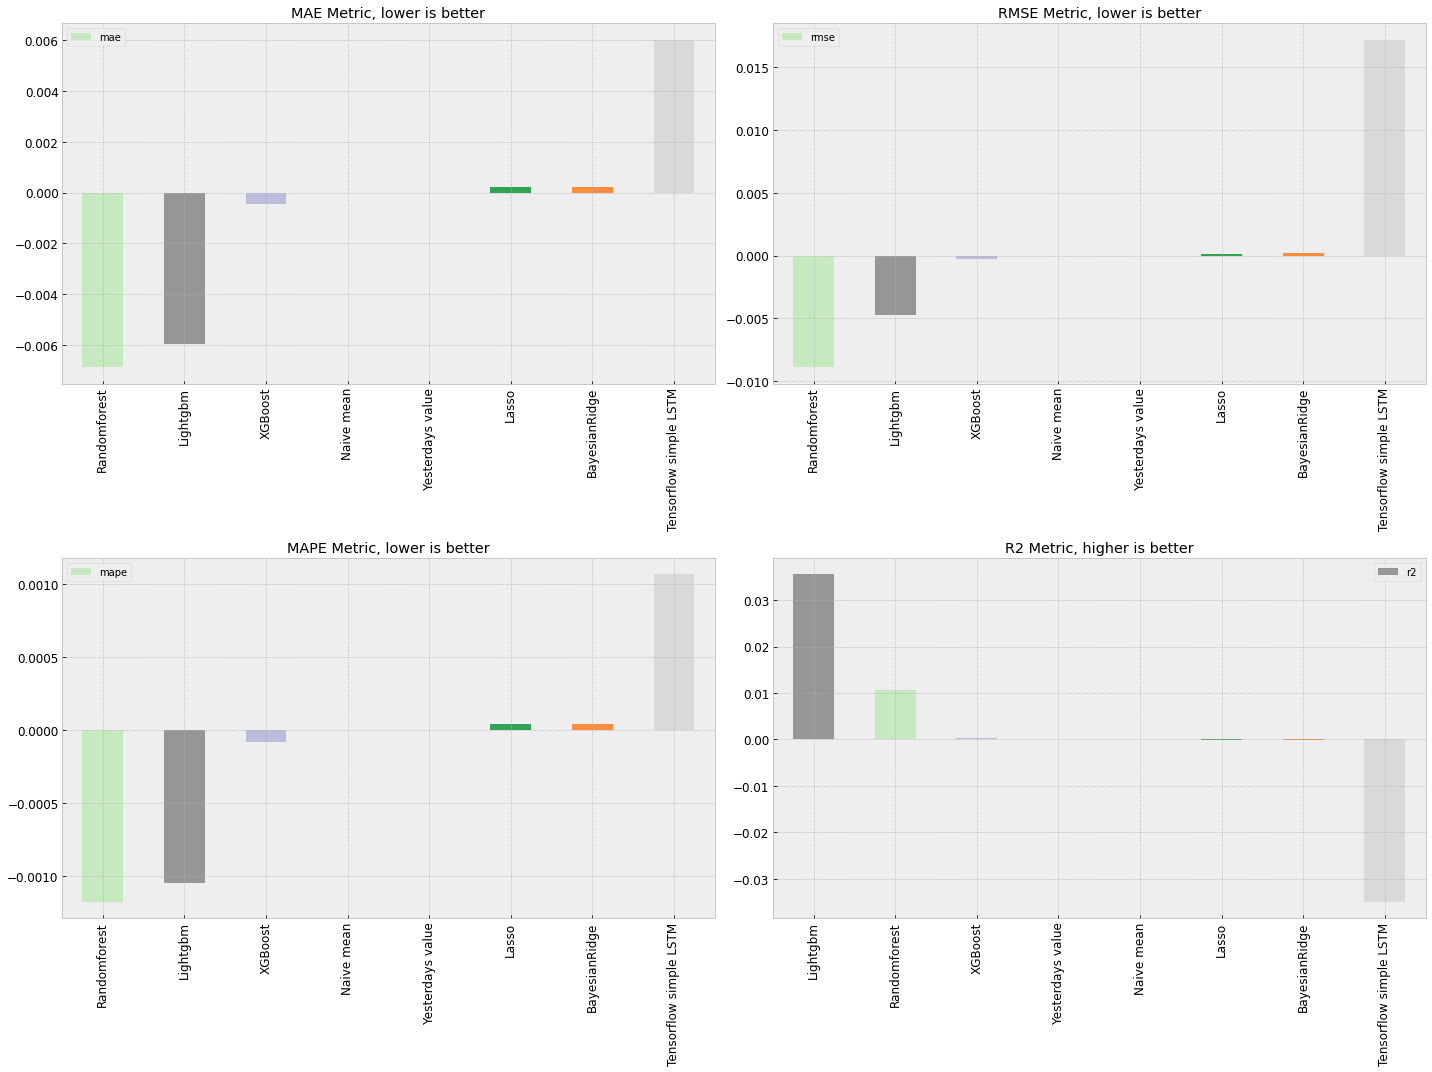

In [ ]:
bar_metrics(resultsComparison)

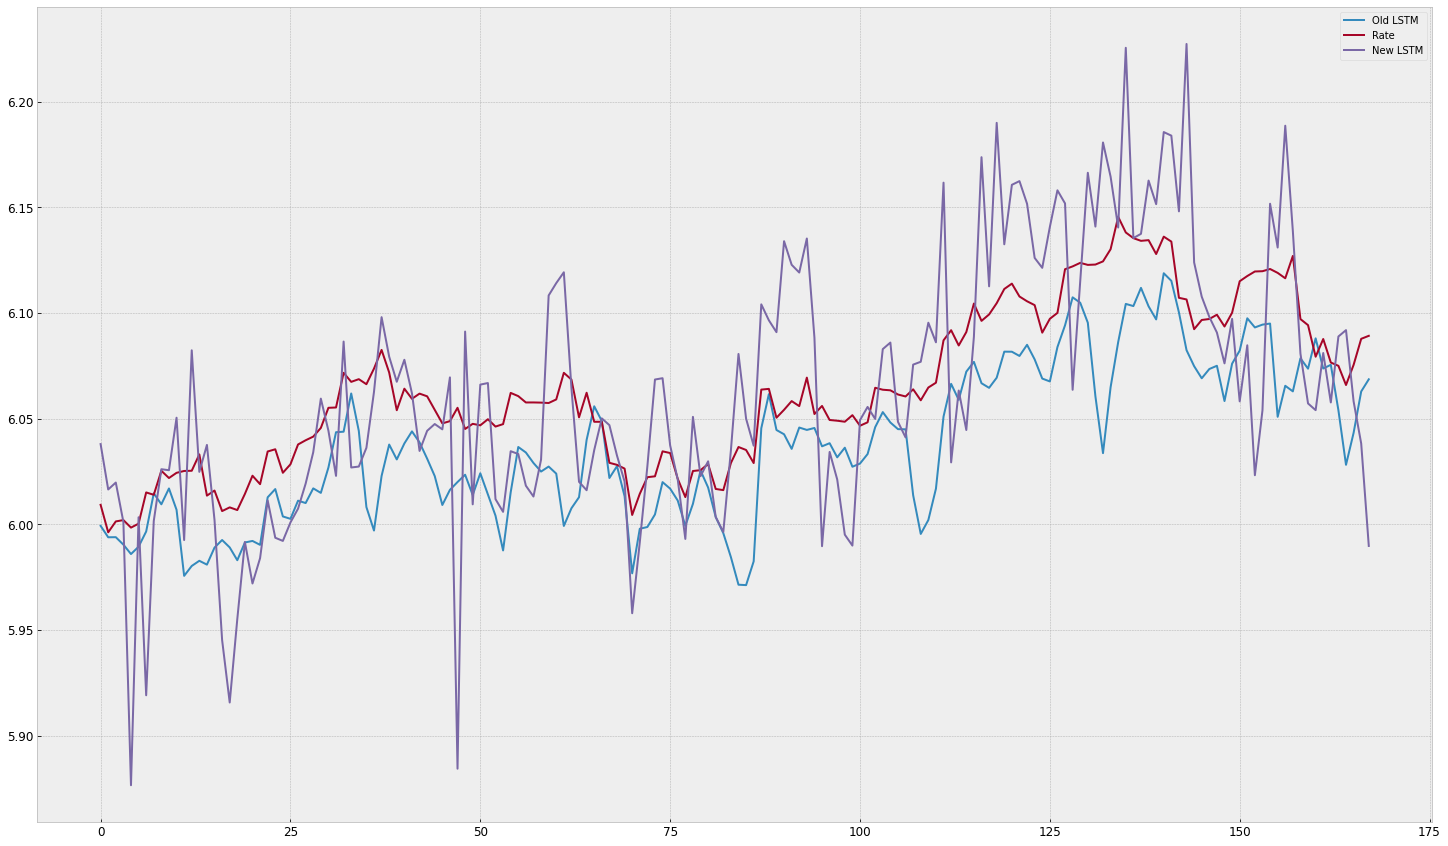

In [ ]:
plt.figure(figsize=(25,15))
plt.plot(predictionsDict['Tensorflow simple LSTM'][2300:2468], label="Old LSTM")
plt.plot(predictionsDict['ORIGINAL'][2300:2468], label="Rate")
plt.plot(predictionsDictTweets['Tensorflow simple LSTM'][2300:2468], label="New LSTM")
plt.legend()

Add ttest_rel with all results

FileNotFoundError: ignored

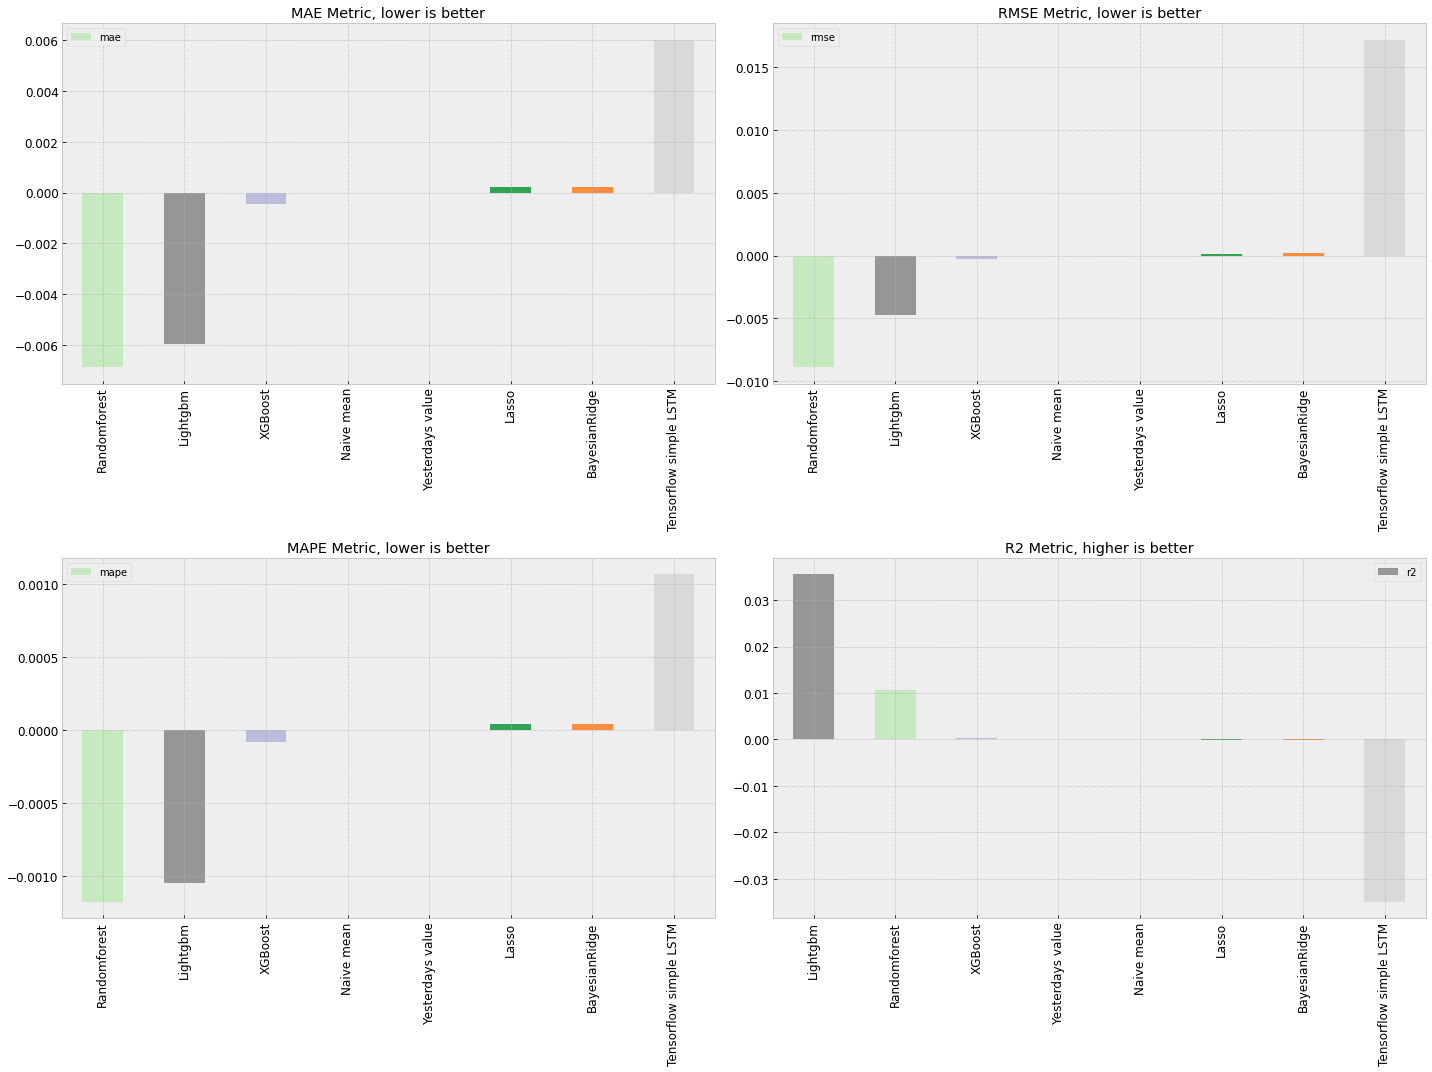

In [ ]:
bar_metrics(resultsComparison)

In [ ]:
import scipy.stats as stats
pre, post = [], []

for model in resultsDict:
  pre.append(resultsDict[model]['mae'])

for model in resultsDictTweets:
  post.append(resultsDictTweets[model]['mae'])

stats.ttest_rel(pre, post)

Ttest_relResult(statistic=-0.6583021338760633, pvalue=0.5227735786572869)

In [ ]:
differenceDict, dftweetsDict = {}, {}
for model in predictionsDict:
  difference, dftweets = [], []
  for i in range(len(predictionsDict[model])):
    difference.append(abs((predictionsDict[model][i] - predictionsDict['ORIGINAL'][i])))
    dftweets.append(abs((predictionsDictTweets[model][i] - predictionsDict['ORIGINAL'][i])))
  differenceDict[model] = difference
  dftweetsDict[model] = dftweets

ttestDict = {}
for model in dftweetsDict:
  pre = differenceDict[model]
  post = dftweetsDict[model]
  ttestDict[model] = stats.ttest_rel(pre, post)

In [ ]:
ttestDict

{'BayesianRidge': Ttest_relResult(statistic=-8.284824421497596, pvalue=1.434501904707776e-16),
 'DeepAR': Ttest_relResult(statistic=-36.27129413691681, pvalue=1.4802905758013035e-261),
 'EnsembleLIGHT+TF': Ttest_relResult(statistic=-2.5219570088046623, pvalue=0.011695091511452527),
 'EnsembleXG+LIGHT': Ttest_relResult(statistic=27.17578098940224, pvalue=8.49427052530324e-154),
 'EnsembleXG+LIGHT+TF': Ttest_relResult(statistic=-2.6284035428302714, pvalue=0.008599693957439702),
 'EnsembleXG+TF': Ttest_relResult(statistic=-9.654414413248466, pvalue=6.696144696885853e-22),
 'Lasso': Ttest_relResult(statistic=-10.062617540711281, pvalue=1.2234173178703577e-23),
 'Lightgbm': Ttest_relResult(statistic=34.065554544496884, pvalue=2.0119178522065084e-233),
 'Naive mean': Ttest_relResult(statistic=nan, pvalue=nan),
 'ORIGINAL': Ttest_relResult(statistic=nan, pvalue=nan),
 'Randomforest': Ttest_relResult(statistic=33.95218251128008, pvalue=5.216422136560322e-232),
 'Tensorflow simple LSTM': Ttest_

In [ ]:
classification = []
classificationDict, classificationTweets = {}, {}

for model in predictionsDict:
  normal, tweets = [], []
  
  for i in range(1, len(predictionsDict['ORIGINAL'])):
    temp = predictionsDict['ORIGINAL'][i] - predictionsDict['Yesterdays value'][i]

    modeltemp = (predictionsDict[model][i] - predictionsDict[model][i-1])
    tweetstemp = (predictionsDictTweets[model][i] - predictionsDictTweets[model][i-1]) 
    
    if modeltemp > 0: modeltemp = 1
    else: modeltemp = 0

    if tweetstemp > 0: tweetstemp = 1
    else: tweetstemp = 0
 
    if temp > 0: temp = 1 
    else: temp = 0

    if modeltemp == temp:
      normal.append(1)
    else:
      normal.append(0)

    if tweetstemp == temp:
      tweets.append(1)
    else:
      tweets.append(0)

  classificationDict[model]= normal
  classificationTweets[model] = tweets

In [ ]:
for model in classificationDict:
  total = sum(classificationDict[model]) #Number of total correct classifications
  totaltweets = sum(classificationTweets[model])

  print(model, " Success rate at normal: ", round(total/6237, 3) , " Success rate tweets version: ", round(totaltweets/6237, 3))

Naive mean  Success rate at normal:  0.485  Success rate tweets version:  0.485
Yesterdays value  Success rate at normal:  0.474  Success rate tweets version:  0.474
ORIGINAL  Success rate at normal:  1.0  Success rate tweets version:  1.0
BayesianRidge  Success rate at normal:  0.489  Success rate tweets version:  0.49
Lasso  Success rate at normal:  0.487  Success rate tweets version:  0.486
Randomforest  Success rate at normal:  0.51  Success rate tweets version:  0.498
XGBoost  Success rate at normal:  0.496  Success rate tweets version:  0.527
Lightgbm  Success rate at normal:  0.559  Success rate tweets version:  0.518
Tensorflow simple LSTM  Success rate at normal:  0.674  Success rate tweets version:  0.575


In [ ]:
len(classificationDict['Lasso'])

6237

In [ ]:
del predictionsDictTweets['Naive mean']
del predictionsDict['Naive mean']
del predictionsDictTweets['Yesterdays value']
del predictionsDict['Yesterdays value']

In [ ]:
del resultsDictTweets['Tensorflow simple LSTM']
del resultsDict['Tensorflow simple LSTM']

In [ ]:
del predictionsDict['EnsembleLIGHT+TF']
del predictionsDict['EnsembleXG+LIGHT']
del predictionsDict['EnsembleXG+LIGHT+TF']
del predictionsDict['EnsembleXG+TF']
del predictionsDict['DeepAR']
del predictionsDictTweets['EnsembleLIGHT+TF']
del predictionsDictTweets['EnsembleXG+LIGHT']
del predictionsDictTweets['EnsembleXG+LIGHT+TF']
del predictionsDictTweets['EnsembleXG+TF']
del predictionsDictTweets['DeepAR']
del resultsDict['EnsembleLIGHT+TF']
del resultsDict['EnsembleXG+LIGHT']
del resultsDict['EnsembleXG+LIGHT+TF']
del resultsDict['EnsembleXG+TF']
del resultsDict['DeepAR']
del resultsDictTweets['EnsembleLIGHT+TF']
del resultsDictTweets['EnsembleXG+LIGHT']
del resultsDictTweets['EnsembleXG+LIGHT+TF']
del resultsDictTweets['EnsembleXG+TF']
del resultsDictTweets['DeepAR']

# Optimized LSTM with ensembled models

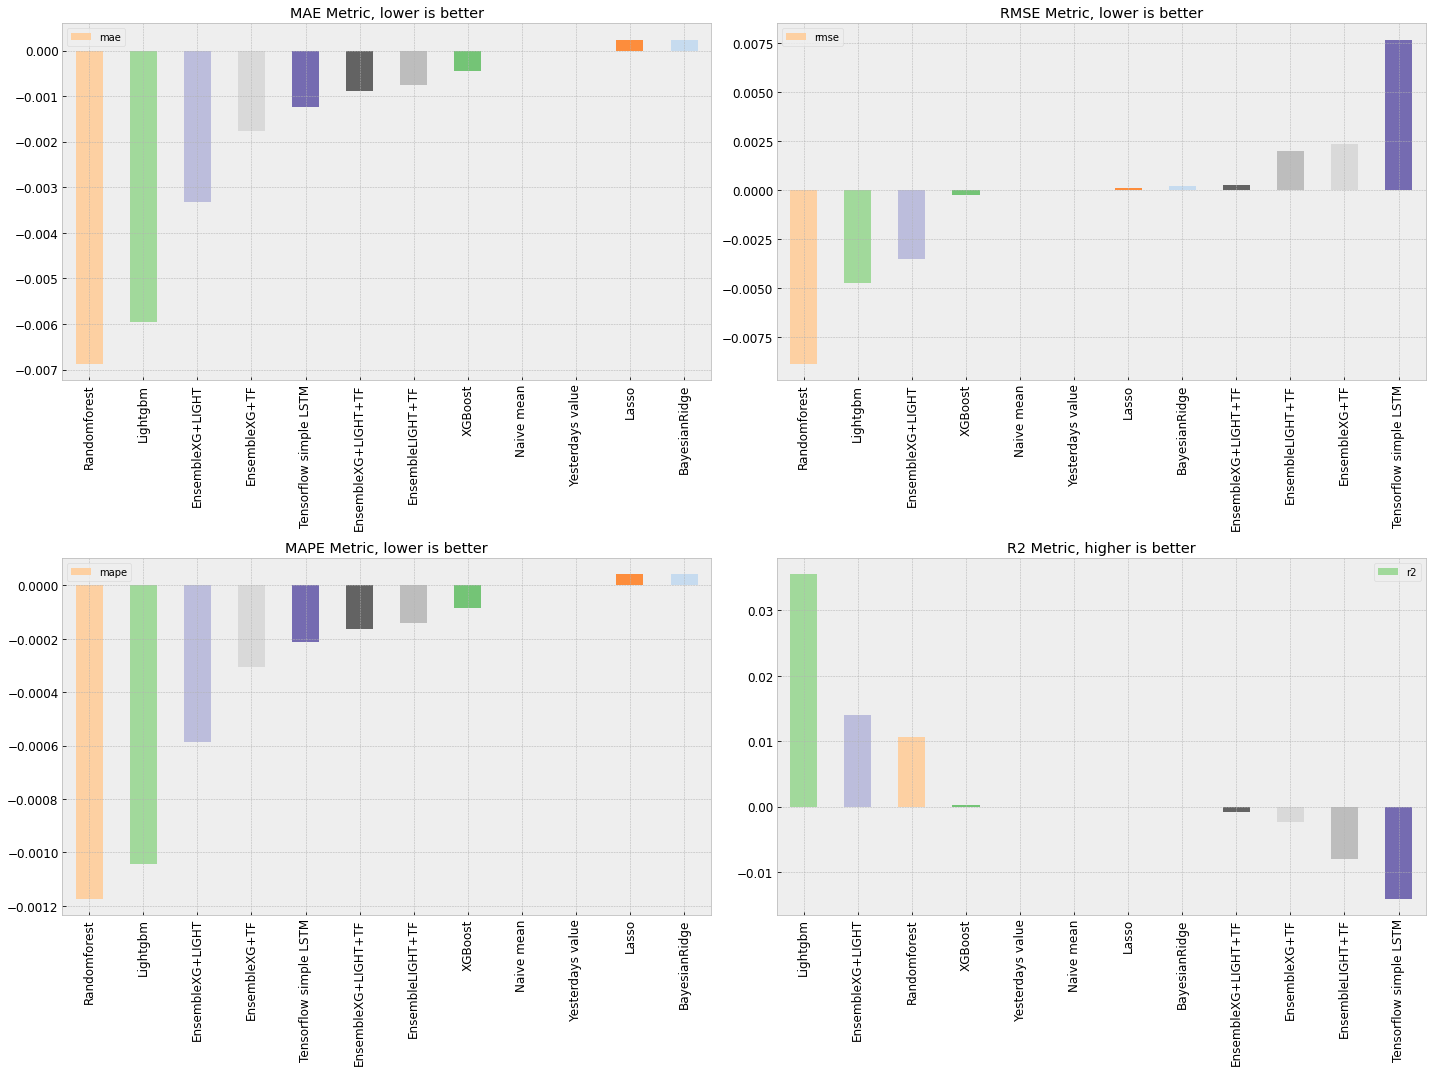

In [7]:
bar_metrics(resultsComparison)

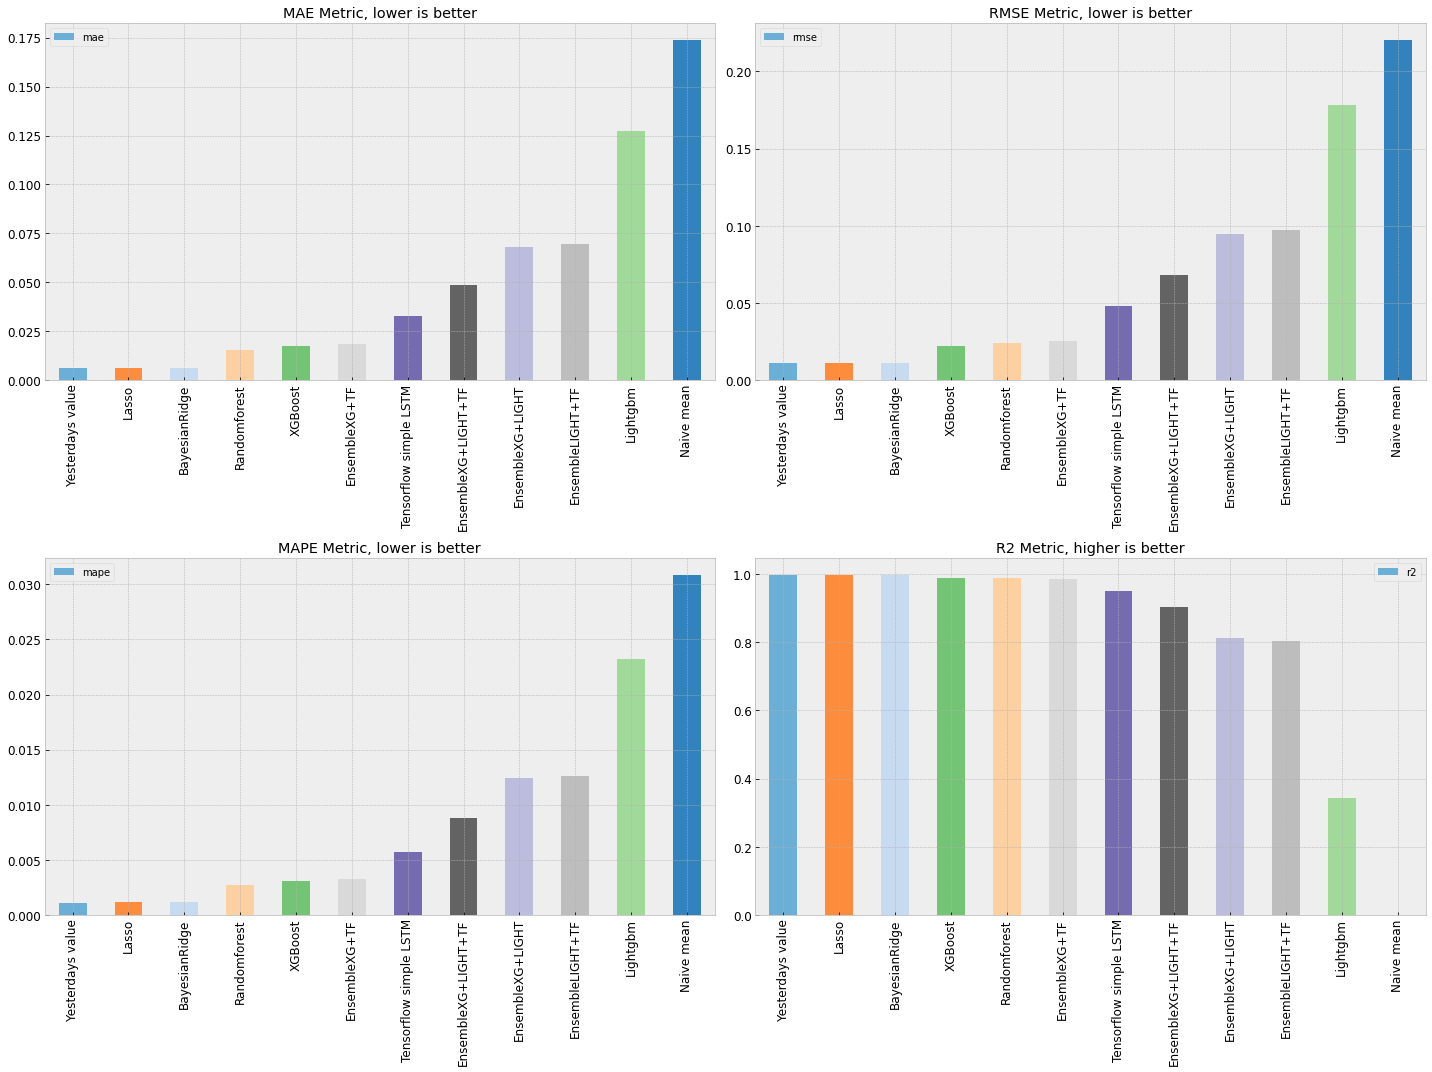

In [13]:
bar_metrics(resultsDictTweets)

In [9]:
import scipy.stats as stats
differenceDict, dftweetsDict = {}, {}
for model in predictionsDict:
  difference, dftweets = [], []
  for i in range(len(predictionsDict[model])):
    difference.append(abs((predictionsDict[model][i] - predictionsDict['ORIGINAL'][i])))
    dftweets.append(abs((predictionsDictTweets[model][i] - predictionsDict['ORIGINAL'][i])))
  differenceDict[model] = difference
  dftweetsDict[model] = dftweets

ttestDict = {}
for model in dftweetsDict:
  pre = differenceDict[model]
  post = dftweetsDict[model]
  ttestDict[model] = stats.ttest_rel(pre, post)

In [10]:
ttestDict

{'BayesianRidge': Ttest_relResult(statistic=-8.284824421497596, pvalue=1.434501904707776e-16),
 'DeepAR': Ttest_relResult(statistic=-36.27129413691681, pvalue=1.4802905758013035e-261),
 'EnsembleLIGHT+TF': Ttest_relResult(statistic=2.110270124162784, pvalue=0.0348748092406605),
 'EnsembleXG+LIGHT': Ttest_relResult(statistic=27.17578098940224, pvalue=8.49427052530324e-154),
 'EnsembleXG+LIGHT+TF': Ttest_relResult(statistic=3.6953633417111065, pvalue=0.00022145407246866513),
 'EnsembleXG+TF': Ttest_relResult(statistic=6.213098643254532, pvalue=5.530235030644598e-10),
 'Lasso': Ttest_relResult(statistic=-10.062617540711281, pvalue=1.2234173178703577e-23),
 'Lightgbm': Ttest_relResult(statistic=34.065554544496884, pvalue=2.0119178522065084e-233),
 'Naive mean': Ttest_relResult(statistic=nan, pvalue=nan),
 'ORIGINAL': Ttest_relResult(statistic=nan, pvalue=nan),
 'Randomforest': Ttest_relResult(statistic=33.95218251128008, pvalue=5.216422136560322e-232),
 'Tensorflow simple LSTM': Ttest_relR

## Convert results to classification - Direction of currency

In [14]:
classification = []
classificationDict, classificationTweets = {}, {}

for model in predictionsDict:
  normal, tweets = [], []
  
  for i in range(1, len(predictionsDict['ORIGINAL'])):
    temp = predictionsDict['ORIGINAL'][i] - predictionsDict['Yesterdays value'][i]

    modeltemp = (predictionsDict[model][i] - predictionsDict[model][i-1])
    tweetstemp = (predictionsDictTweets[model][i] - predictionsDictTweets[model][i-1]) 
    
    if modeltemp > 0: modeltemp = 1
    else: modeltemp = 0

    if tweetstemp > 0: tweetstemp = 1
    else: tweetstemp = 0
 
    if temp > 0: temp = 1 
    else: temp = 0

    if modeltemp == temp:
      normal.append(1)
    else:
      normal.append(0)

    if tweetstemp == temp:
      tweets.append(1)
    else:
      tweets.append(0)

  classificationDict[model]= normal
  classificationTweets[model] = tweets

In [15]:
for model in classificationDict:
  total = sum(classificationDict[model]) #Number of total correct classifications
  totaltweets = sum(classificationTweets[model])

  print(model, " Success rate at normal: ", round(total/6237, 3) , " Success rate tweets version: ", round(totaltweets/6237, 3))

Naive mean  Success rate at normal:  0.485  Success rate tweets version:  0.485
Yesterdays value  Success rate at normal:  0.474  Success rate tweets version:  0.474
ORIGINAL  Success rate at normal:  1.0  Success rate tweets version:  1.0
BayesianRidge  Success rate at normal:  0.489  Success rate tweets version:  0.49
Lasso  Success rate at normal:  0.487  Success rate tweets version:  0.486
Randomforest  Success rate at normal:  0.51  Success rate tweets version:  0.498
XGBoost  Success rate at normal:  0.496  Success rate tweets version:  0.527
Lightgbm  Success rate at normal:  0.559  Success rate tweets version:  0.518
Tensorflow simple LSTM  Success rate at normal:  0.674  Success rate tweets version:  0.614
DeepAR  Success rate at normal:  0.511  Success rate tweets version:  0.505
EnsembleXG+LIGHT  Success rate at normal:  0.539  Success rate tweets version:  0.503
EnsembleXG+LIGHT+TF  Success rate at normal:  0.635  Success rate tweets version:  0.583
EnsembleLIGHT+TF  Succes

## Results of models with trained difference

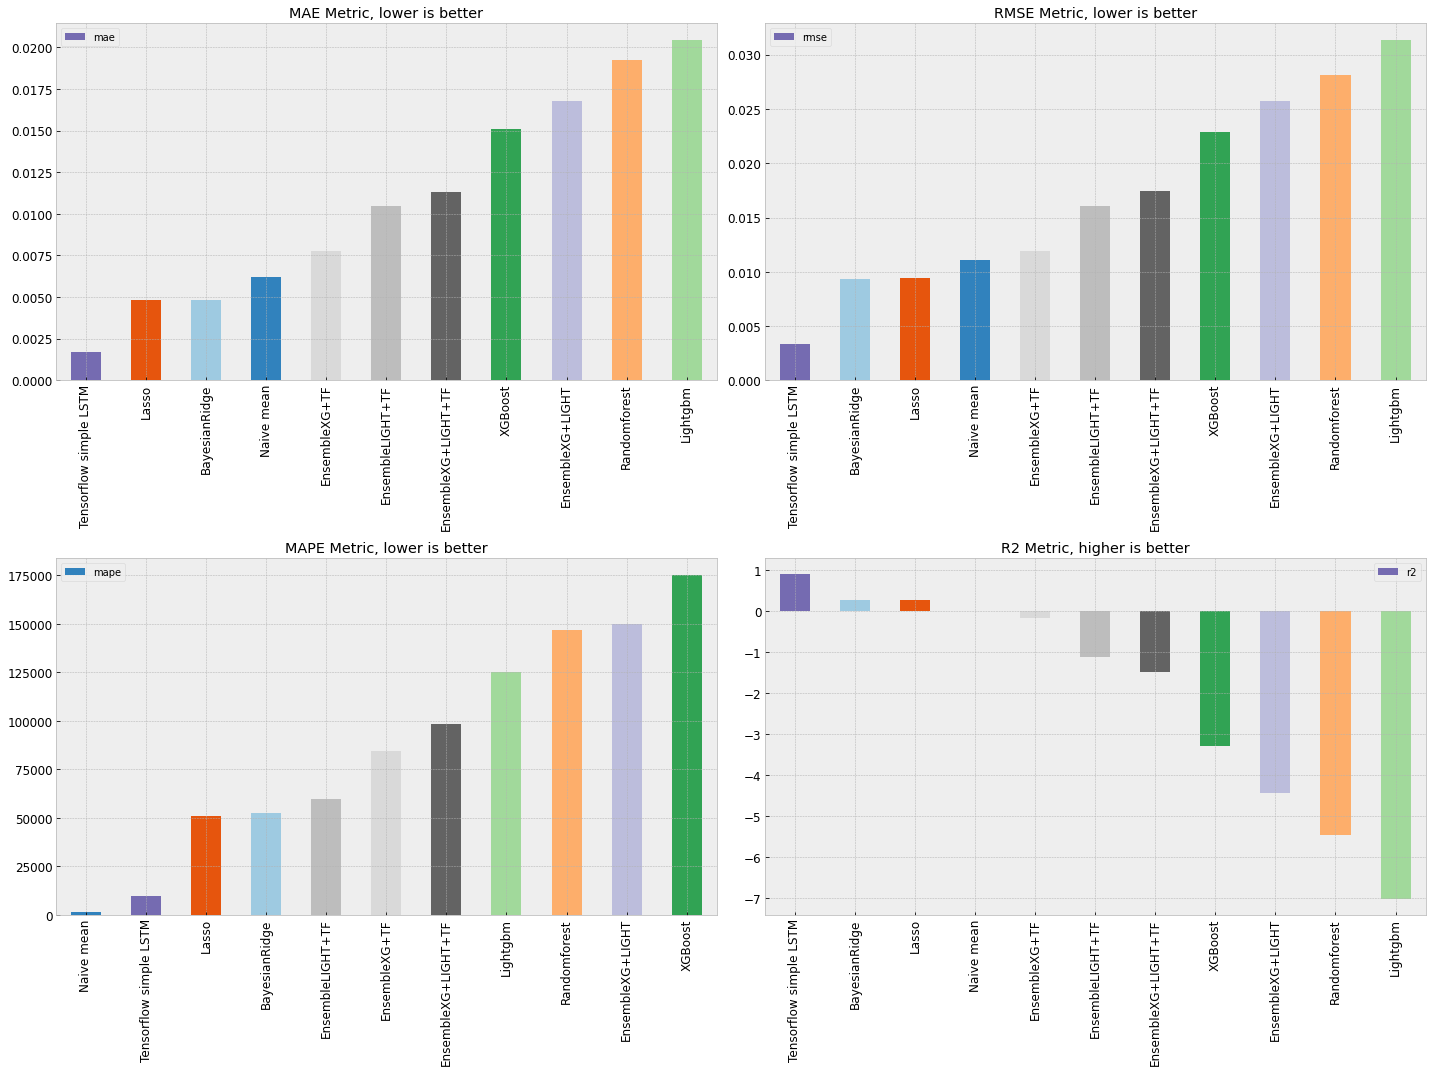

In [21]:
bar_metrics(resultsDict)